<a href="https://colab.research.google.com/github/CamK2/ComputerVision/blob/main/Using_Features_for_Face_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Objectives**
* understand filters and kernels for features generation generally
* understand Fourier Series and Wavelets generally
* use a Wavelet (called the Haar Wavelet) to generate features for Face Detection.

<hr>

opencv2 functions:
* cv2.imread(...) - loads a file into a numpy ndarray (matrix)
* cv2.cvtColor(...) - Converts image colors based on RGB/BGR
* cv2.CascadeClassifier(...) - implements a Haar Wavelet classifier optimized for face detection.

In [16]:
# get image off the internet and display it
import cv2
import numpy as np
import matplotlib.pyplot as plt

!wget "https://www.cheatsheet.com/wp-content/uploads/2020/11/Marvel-star-Robert-Downey-Jr.jpg"
!mv "Marvel-star-Robert-Downey-Jr.jpg" "img.jpg"
!wget "https://townsquare.media/site/366/files/2018/10/metallica_by_Ross_Halfin.jpg"
!mv "metallica_by_Ross_Halfin.jpg" "img.jpg"

--2022-10-17 17:11:29--  https://www.cheatsheet.com/wp-content/uploads/2020/11/Marvel-star-Robert-Downey-Jr.jpg
Resolving www.cheatsheet.com (www.cheatsheet.com)... 104.18.29.143, 104.18.28.143, 2606:4700::6812:1d8f, ...
Connecting to www.cheatsheet.com (www.cheatsheet.com)|104.18.29.143|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 871639 (851K) [image/jpeg]
Saving to: ‘Marvel-star-Robert-Downey-Jr.jpg’

Marvel-star-Robert- 100%[===================>] 851.21K  --.-KB/s    in 0.04s   

2022-10-17 17:11:29 (22.5 MB/s) - ‘Marvel-star-Robert-Downey-Jr.jpg’ saved [871639/871639]

--2022-10-17 17:11:29--  https://townsquare.media/site/366/files/2018/10/metallica_by_Ross_Halfin.jpg
Resolving townsquare.media (townsquare.media)... 192.229.163.86
Connecting to townsquare.media (townsquare.media)|192.229.163.86|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 332005 (324K) [image/jpeg]
Saving to: ‘metallica_by_Ross_Halfin.jpg’

metallica_by_Ro

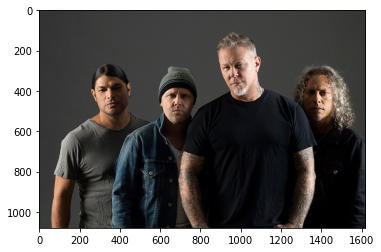

In [17]:
img = cv2.imread("img.jpg")
img_correct_color = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_correct_color)
plt.show()

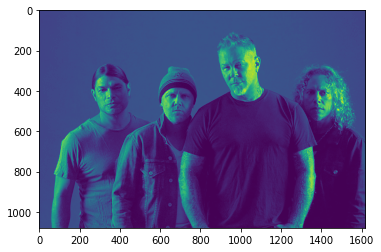

In [18]:
# generate a grayscale copy of the image
img_gray = cv2.cvtColor(img_correct_color, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray)

In [19]:
# initialize the Haar Wavelet CascadeClassifier
face_cas_class = cv2.CascadeClassifier(
    cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
face_output = face_cas_class.detectMultiScale(img_gray, 1.1, 4)
# detectMultiScale returns a set of (x,y,height,width) of face candidates
print(type(face_output))
print(face_output.shape)
print('Number of faces detected: ', face_output.shape[0])

<class 'numpy.ndarray'>
(5, 4)
Number of faces detected:  5


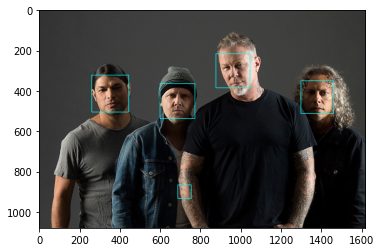

In [22]:
# we use opencv to draw rectangles for each face onto the original image
for face in face_output:
  x,y,height,width = face
  # plot a rectangle on original image
  cv2.rectangle(img,
                (x,y),
                (x+width,y+height),
                color=(255,255,0),
                thickness=2)
img_fixed = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_fixed)